## Fast Agent

In [18]:
import { SqlDatabase } from "langchain/sql_db";
import { DataSource } from "typeorm";

const datasource = new DataSource({
    type: "sqlite",
    database: "./Chinook.db", // Replace with the link to your database
});
const db = await SqlDatabase.fromDataSourceParams({
    appDataSource: datasource,
});

In [19]:
import { tool } from "langchain";
import { z } from "zod";

export const executeSQL = tool(({ query }) => {
    return db.run(query)
}, {
    name: "execute_sql",
    description: "Execute a SQLite command and return results.",
    schema: z.object({ query: z.string() })
})

In [20]:
export const systemPrompt = `You are a careful SQLite analyst.

Rules:
- Think step-by-step.
- When you need data, call the tool \`execute_sql\` with ONE SELECT query.
- Read-only only; no INSERT/UPDATE/DELETE/ALTER/DROP/CREATE/REPLACE/TRUNCATE.
- Limit to 5 rows of output unless the user explicitly asks otherwise.
- If the tool returns 'Error:', revise the SQL and try again.
- Prefer explicit column lists; avoid SELECT *.`

In [21]:
import "dotenv/config"
import { createAgent, type SqlDatabase } from "langchain";

const agent = createAgent({
    model: "openai:gpt-5",
    tools: [executeSQL],
    systemPrompt,
})

[Module: null prototype] { default: {}, "module.exports": {} }

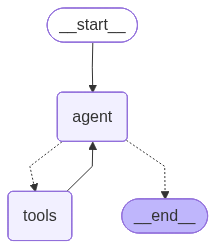

In [24]:
await agent.drawMermaidPng()

In [25]:
const question = "Which table has the largest number of entries?"
const stream = await agent.stream({
    messages: question
}, {
    stream_mode: "values",
})

for await (const step of stream) {
    console.log(`${step?.messages?.at(-1).type} - ${step?.messages?.at(-1).content}`)
}

human - Which table has the largest number of entries?


Failed to Failed to send multipart request. Received status [403]: Forbidden. Message:

Context: trace=1a3d3caf-6176-43ef-ae56-2e0ce653adec,id=1a3d3caf-6176-43ef-ae56-2e0ce653adec; trace=1a3d3caf-6176-43ef-ae56-2e0ce653adec,id=5cddf7ba-dbfc-49c9-a8e0-f5ca91b889ef; trace=1a3d3caf-6176-43ef-ae56-2e0ce653adec,id=797ae1f5-3390-4cb8-9a5a-282f9b9d4b78; trace=1a3d3caf-6176-43ef-ae56-2e0ce653adec,id=f3ea3aa8-c51c-4b84-9800-2db2e8964abb; trace=1a3d3caf-6176-43ef-ae56-2e0ce653adec,id=b5b2f89d-614e-470b-b502-dc090e446caa; trace=1a3d3caf-6176-43ef-ae56-2e0ce653adec,id=520365bc-dda1-47ae-9e3c-723dd0f8a8b7; trace=1a3d3caf-6176-43ef-ae56-2e0ce653adec,id=b3e0dd78-aa77-4046-adbb-e3140f3df426; trace=1a3d3caf-6176-43ef-ae56-2e0ce653adec,id=624b7e65-0aaa-42d7-8abc-122d59cfde51


ai - 
tool - [{"name":"Album"},{"name":"Artist"},{"name":"Customer"},{"name":"Employee"},{"name":"Genre"},{"name":"Invoice"},{"name":"InvoiceLine"},{"name":"MediaType"},{"name":"Playlist"},{"name":"PlaylistTrack"},{"name":"Track"}]


Failed to Failed to send multipart request. Received status [403]: Forbidden. Message:

Context: trace=1a3d3caf-6176-43ef-ae56-2e0ce653adec,id=a085d67f-acc8-418b-9f7d-7bfc484bc4f9; trace=1a3d3caf-6176-43ef-ae56-2e0ce653adec,id=ec5b4290-c8a4-4d2c-81e2-476cb641c36f; trace=1a3d3caf-6176-43ef-ae56-2e0ce653adec,id=fd2370d0-db1c-491d-b24c-6b536f90542d; trace=1a3d3caf-6176-43ef-ae56-2e0ce653adec,id=3ac146ed-37f0-4794-85e8-6f652208cf3d; trace=1a3d3caf-6176-43ef-ae56-2e0ce653adec,id=9276b74a-ef4f-4856-8d45-07070ed3c5ba; trace=1a3d3caf-6176-43ef-ae56-2e0ce653adec,id=ae6ba147-9bc8-4ccd-95d1-b09d2eb68b24; trace=1a3d3caf-6176-43ef-ae56-2e0ce653adec,id=b67598b1-0512-4de2-886d-1d5ce8a2264e; trace=1a3d3caf-6176-43ef-ae56-2e0ce653adec,id=4184c047-2532-41c4-8e01-ecff3a30617b; trace=1a3d3caf-6176-43ef-ae56-2e0ce653adec,id=2f2f5e93-96be-4c72-8ee4-d21df110e7d7; trace=1a3d3caf-6176-43ef-ae56-2e0ce653adec,id=e2c32abd-7d56-421a-ad34-406ba2a251e7; trace=1a3d3caf-6176-43ef-ae56-2e0ce653adec,id=624b7e65-0aaa-42d

ai - 
tool - [{"table_name":"PlaylistTrack","cnt":8715}]


Failed to Failed to send multipart request. Received status [403]: Forbidden. Message:

Context: trace=1a3d3caf-6176-43ef-ae56-2e0ce653adec,id=9b66a89a-10e8-4575-a6d7-523de51f712f; trace=1a3d3caf-6176-43ef-ae56-2e0ce653adec,id=412f5dbe-aa15-4c0f-ab67-0e79340ee328; trace=1a3d3caf-6176-43ef-ae56-2e0ce653adec,id=5e92020f-856d-44c4-b7f3-62aefd471c93; trace=1a3d3caf-6176-43ef-ae56-2e0ce653adec,id=b0a0ddf8-7431-42a7-95f3-1469758f5c23; trace=1a3d3caf-6176-43ef-ae56-2e0ce653adec,id=02d26f76-ffd1-4992-8699-ea710ab1b9f3; trace=1a3d3caf-6176-43ef-ae56-2e0ce653adec,id=64459ee5-473d-453b-9a4c-5cff4a887cb4; trace=1a3d3caf-6176-43ef-ae56-2e0ce653adec,id=949ac3c0-5026-4f24-a02c-55ae85888d01; trace=1a3d3caf-6176-43ef-ae56-2e0ce653adec,id=6a46ec66-fe69-4227-a5ef-311e621241f9; trace=1a3d3caf-6176-43ef-ae56-2e0ce653adec,id=b22ee34b-d29b-4bbf-b96d-020265d9dadf; trace=1a3d3caf-6176-43ef-ae56-2e0ce653adec,id=9c76cfd2-cc72-4d42-b961-5c8bce2bcff2; trace=1a3d3caf-6176-43ef-ae56-2e0ce653adec,id=e2c32abd-7d56-421

ai - PlaylistTrack — it has 8,715 rows.


Failed to Failed to send multipart request. Received status [403]: Forbidden. Message:

Context: trace=1a3d3caf-6176-43ef-ae56-2e0ce653adec,id=c341c2d0-3a8c-4d7a-8ef5-f237db44fc6d; trace=1a3d3caf-6176-43ef-ae56-2e0ce653adec,id=96fa5698-2ec6-4a7e-a5fe-f07e1611000f; trace=1a3d3caf-6176-43ef-ae56-2e0ce653adec,id=9c76cfd2-cc72-4d42-b961-5c8bce2bcff2; trace=1a3d3caf-6176-43ef-ae56-2e0ce653adec,id=6a46ec66-fe69-4227-a5ef-311e621241f9; trace=1a3d3caf-6176-43ef-ae56-2e0ce653adec,id=949ac3c0-5026-4f24-a02c-55ae85888d01; trace=1a3d3caf-6176-43ef-ae56-2e0ce653adec,id=1a3d3caf-6176-43ef-ae56-2e0ce653adec


In [26]:
const question = "Which genre on average has the longest tracks?"
const stream = await agent.stream({
    messages: question
}, {
    stream_mode: "values",
})

for await (const step of stream) {
    console.log(`${step?.messages?.at(-1).type} - ${step?.messages?.at(-1).content}`)
}

human - Which genre on average has the longest tracks?


Failed to Failed to send multipart request. Received status [403]: Forbidden. Message:

Context: trace=272ec8fa-e69f-4382-86b0-d085058e5e2c,id=272ec8fa-e69f-4382-86b0-d085058e5e2c; trace=272ec8fa-e69f-4382-86b0-d085058e5e2c,id=adf191bb-ff32-4cfb-81a9-ba2f7480bc76; trace=272ec8fa-e69f-4382-86b0-d085058e5e2c,id=b74eb4ae-d5e8-451c-8ff1-3313265cfb1a; trace=272ec8fa-e69f-4382-86b0-d085058e5e2c,id=89ed78ab-7039-4e68-a478-83db032a2347; trace=272ec8fa-e69f-4382-86b0-d085058e5e2c,id=883ad4bd-1305-4958-93d1-e8d71a87291a; trace=272ec8fa-e69f-4382-86b0-d085058e5e2c,id=8bbc0895-8de9-43c3-9c22-0749ac0ee96f; trace=272ec8fa-e69f-4382-86b0-d085058e5e2c,id=fd79e230-c7ce-4fc0-bd6d-721d8aaac236; trace=272ec8fa-e69f-4382-86b0-d085058e5e2c,id=205a2239-0704-4f0e-bcef-2ec08219b54b


ai - 
tool - [{"name":"Album"},{"name":"Artist"},{"name":"Customer"},{"name":"Employee"},{"name":"Genre"},{"name":"Invoice"},{"name":"InvoiceLine"},{"name":"MediaType"},{"name":"Playlist"},{"name":"PlaylistTrack"},{"name":"Track"}]


Failed to Failed to send multipart request. Received status [403]: Forbidden. Message:

Context: trace=272ec8fa-e69f-4382-86b0-d085058e5e2c,id=8eef0807-d155-41b5-80f2-08f458919db9; trace=272ec8fa-e69f-4382-86b0-d085058e5e2c,id=9827e971-6d46-4977-8f7c-2f72dc348e45; trace=272ec8fa-e69f-4382-86b0-d085058e5e2c,id=146fd43f-fd3e-4828-8fbe-e5883e56a141; trace=272ec8fa-e69f-4382-86b0-d085058e5e2c,id=5e589eda-d46f-4980-896b-b61fbba34e54; trace=272ec8fa-e69f-4382-86b0-d085058e5e2c,id=cafb7da6-cc70-48c8-a3d3-fb7aff5f0303; trace=272ec8fa-e69f-4382-86b0-d085058e5e2c,id=96b87479-aaaf-45bc-9eae-65e926c9df0a; trace=272ec8fa-e69f-4382-86b0-d085058e5e2c,id=7f3adf2b-0554-4c12-9591-f84c1a9fd3c9; trace=272ec8fa-e69f-4382-86b0-d085058e5e2c,id=c8965d3e-6469-499f-bca8-d6cd8305dd79; trace=272ec8fa-e69f-4382-86b0-d085058e5e2c,id=ea485fe1-1e7d-4814-98f8-8d2bb60b5944; trace=272ec8fa-e69f-4382-86b0-d085058e5e2c,id=e7dbbada-1e9b-4d66-910d-7cdaa08e509b; trace=272ec8fa-e69f-4382-86b0-d085058e5e2c,id=205a2239-0704-4f0

ai - 
tool - [{"Genre":"Sci Fi & Fantasy","AvgMilliseconds":2911783.0384615385}]


Failed to Failed to send multipart request. Received status [403]: Forbidden. Message:

Context: trace=272ec8fa-e69f-4382-86b0-d085058e5e2c,id=37c8d6e9-991a-4d60-9e42-e4e3d20f718f; trace=272ec8fa-e69f-4382-86b0-d085058e5e2c,id=d4df78fa-9f3b-457a-a9e0-6f473b25d7b6; trace=272ec8fa-e69f-4382-86b0-d085058e5e2c,id=8d691865-7d2f-4e52-9f2b-ec925cca6795; trace=272ec8fa-e69f-4382-86b0-d085058e5e2c,id=2f536097-60ad-439c-a25b-7f307dd43a08; trace=272ec8fa-e69f-4382-86b0-d085058e5e2c,id=444d65b8-e463-4a91-a1f7-7ae3355d9d67; trace=272ec8fa-e69f-4382-86b0-d085058e5e2c,id=d0b9c869-151d-4b31-b471-054a8d77454c; trace=272ec8fa-e69f-4382-86b0-d085058e5e2c,id=92b5c37b-81b8-407f-9032-72110a13bad5; trace=272ec8fa-e69f-4382-86b0-d085058e5e2c,id=65f83432-24b8-4657-90af-8050b29c1cb7; trace=272ec8fa-e69f-4382-86b0-d085058e5e2c,id=6d7f64ab-e70a-4507-ac6a-da5a585d803c; trace=272ec8fa-e69f-4382-86b0-d085058e5e2c,id=769d0c4f-8171-40ea-b9a0-cf54493b8697; trace=272ec8fa-e69f-4382-86b0-d085058e5e2c,id=e7dbbada-1e9b-4d6

ai - Sci Fi & Fantasy — averaging about 48 minutes 32 seconds per track.


Failed to Failed to send multipart request. Received status [403]: Forbidden. Message:

Context: trace=272ec8fa-e69f-4382-86b0-d085058e5e2c,id=30fd1a97-0943-469b-b666-88988a9a5025; trace=272ec8fa-e69f-4382-86b0-d085058e5e2c,id=efb68398-cbec-48a2-bb66-0225a231cda5; trace=272ec8fa-e69f-4382-86b0-d085058e5e2c,id=769d0c4f-8171-40ea-b9a0-cf54493b8697; trace=272ec8fa-e69f-4382-86b0-d085058e5e2c,id=65f83432-24b8-4657-90af-8050b29c1cb7; trace=272ec8fa-e69f-4382-86b0-d085058e5e2c,id=92b5c37b-81b8-407f-9032-72110a13bad5; trace=272ec8fa-e69f-4382-86b0-d085058e5e2c,id=272ec8fa-e69f-4382-86b0-d085058e5e2c


In [27]:
const question = "What are all the tables?";
const stream = await agent.stream({
    messages: question
}, {
    stream_mode: "values",
})

for await (const step of stream) {
    console.log(`${step?.messages?.at(-1).type} - ${step?.messages?.at(-1).content}`)
}

human - What are all the tables?


Failed to Failed to send multipart request. Received status [403]: Forbidden. Message:

Context: trace=179d1fda-417a-4e68-8c3a-39dd09474099,id=179d1fda-417a-4e68-8c3a-39dd09474099; trace=179d1fda-417a-4e68-8c3a-39dd09474099,id=1481e609-495a-4948-adec-6420aedcc544; trace=179d1fda-417a-4e68-8c3a-39dd09474099,id=bd9a6c6e-b27f-4941-9085-9d34d7a27a29; trace=179d1fda-417a-4e68-8c3a-39dd09474099,id=59808eed-92bb-4593-9d4e-04b027a4fb32; trace=179d1fda-417a-4e68-8c3a-39dd09474099,id=a63257a5-0bf8-48cf-853a-4222adb8b112; trace=179d1fda-417a-4e68-8c3a-39dd09474099,id=9625061f-dc0c-4835-9606-d4ea8917a72e; trace=179d1fda-417a-4e68-8c3a-39dd09474099,id=d1aeb4f1-f0ba-4e45-a71c-c489234fb02d; trace=179d1fda-417a-4e68-8c3a-39dd09474099,id=4d1e5ba4-ce00-4f51-86ab-9251a1036e5b


ai - 
tool - [{"name":"Album"},{"name":"Artist"},{"name":"Customer"},{"name":"Employee"},{"name":"Genre"},{"name":"Invoice"},{"name":"InvoiceLine"},{"name":"MediaType"},{"name":"Playlist"},{"name":"PlaylistTrack"},{"name":"Track"}]


Failed to Failed to send multipart request. Received status [403]: Forbidden. Message:

Context: trace=179d1fda-417a-4e68-8c3a-39dd09474099,id=ca57f2a8-73b9-4096-b1a0-8ec23413098f; trace=179d1fda-417a-4e68-8c3a-39dd09474099,id=9124619e-448f-49a8-ab0f-76d464f543a3; trace=179d1fda-417a-4e68-8c3a-39dd09474099,id=cc616528-a3eb-4474-b0d9-2d656a996b85; trace=179d1fda-417a-4e68-8c3a-39dd09474099,id=f2613193-d299-4ee6-8149-a826580a1c28; trace=179d1fda-417a-4e68-8c3a-39dd09474099,id=b9453e93-87cc-46b8-b9da-5d189fb7ef45; trace=179d1fda-417a-4e68-8c3a-39dd09474099,id=223e4161-a2dd-45b6-a540-4f428d891364; trace=179d1fda-417a-4e68-8c3a-39dd09474099,id=a0959d14-9808-4871-88c9-14ebab0e3d06; trace=179d1fda-417a-4e68-8c3a-39dd09474099,id=bac20ad7-3ee5-44c0-a001-1a62b3380f29; trace=179d1fda-417a-4e68-8c3a-39dd09474099,id=c56abe99-b4ca-44b9-85fd-1b88e58864c7; trace=179d1fda-417a-4e68-8c3a-39dd09474099,id=347ff4ed-bd05-4f79-82c4-f359caf99c4a; trace=179d1fda-417a-4e68-8c3a-39dd09474099,id=4d1e5ba4-ce00-4f5

ai - - Album
- Artist
- Customer
- Employee
- Genre
- Invoice
- InvoiceLine
- MediaType
- Playlist
- PlaylistTrack
- Track


Failed to Failed to send multipart request. Received status [403]: Forbidden. Message:

Context: trace=179d1fda-417a-4e68-8c3a-39dd09474099,id=2ec242c3-1f32-43a5-abcb-f8b25b37da0c; trace=179d1fda-417a-4e68-8c3a-39dd09474099,id=27b18690-024a-4a4a-a27d-5dfecb7d75a2; trace=179d1fda-417a-4e68-8c3a-39dd09474099,id=347ff4ed-bd05-4f79-82c4-f359caf99c4a; trace=179d1fda-417a-4e68-8c3a-39dd09474099,id=bac20ad7-3ee5-44c0-a001-1a62b3380f29; trace=179d1fda-417a-4e68-8c3a-39dd09474099,id=a0959d14-9808-4871-88c9-14ebab0e3d06; trace=179d1fda-417a-4e68-8c3a-39dd09474099,id=179d1fda-417a-4e68-8c3a-39dd09474099
